# **Causal inference with observational data**
## Difference-in-difference
* Have repeated overvations of the outcome over time? (시계열인가?)
 * yes
* Have a control time series data from a non-treated unit? (대조군이 있는가?)
 * yes
* **More than a handful of obs before and after intervention? (이벤트 전&후에 데이터 많은가?)**
 * **no**
 
$\rightarrow$ 시계열 접근 방법  
$\rightarrow$ Interrupted Time Series analysis 에서 대조군이 있고 이벤트 전후 데이터가 **적을때** 적용할 수 있는 방법 

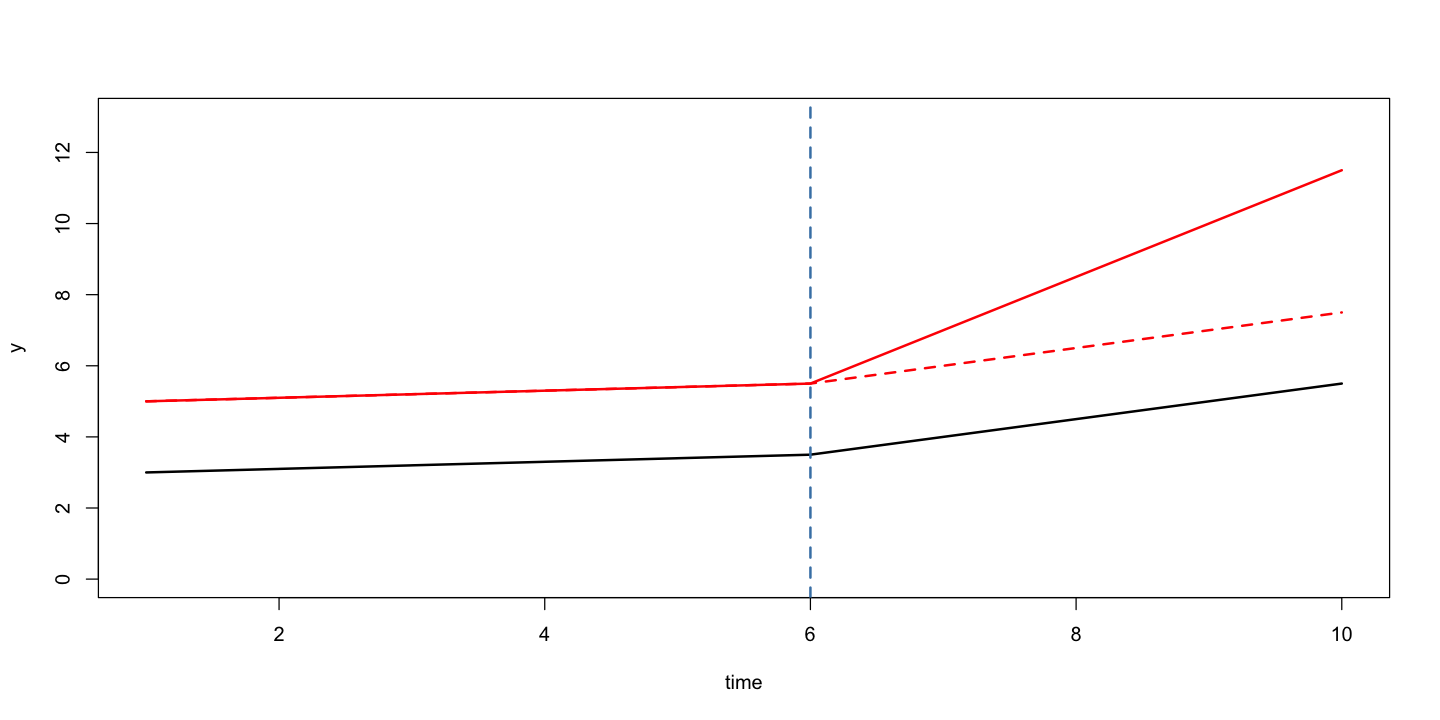

In [18]:
y1<-seq(0,0.5,by=.1)
y2<-c(1,1.5,2,2.5)
y3<-c(2,3.5,5,6.5)
options(repr.plot.width=12, repr.plot.height=6)
plot(c(y1,y2)+3,type='l',ylim=c(0,13),ylab='y',xlab='time',lwd=2)
lines(c(y1,y3)+5,col='red',lwd=2)
lines(c(y1,y2)+5,col='red',lwd=2,lty=2)
abline(v=6,col='steelblue',lwd=2,lty=2)

### ATT(Average effect of treatment on the treated)
$$ATT = \mathbb E [Y^1(2)-Y^0(2)|A=1]$$

### Assumptions
1. Consistency
2. Counterfactual assumption(Parallel Trends)
3. Positive Assumption


### Model

$$y_{igt}=\alpha+T_{igt}\gamma+D_{igt}\eta+\beta\text{TREAT}_{igt} + \varepsilon_{igt},\\ i=1,\ldots,N_g, \ g=1,\ldots, G, \ t=1,\ldots,T.$$

where $i$ indexes individuals, $g$ indexes groups, $t$ indexes time periods, $T_{igt}$ is a row vector of time dummies, $D_{igt}$ is a row vector of group dummies, and $\text{TREAT}_{igt}$ is equal to 1 for boservations that where in a teated group during a teated period and zero otherwise.

$$\mathbf y \equiv 
\begin{bmatrix}
y_1  \\
y_2  \\
\vdots \\
y_G
\end{bmatrix} = \mathbf X \boldsymbol {\beta} + \boldsymbol  {\epsilon} \equiv \begin{bmatrix} X_1\\ X_2\\ \vdots\\ X_G \end{bmatrix} \boldsymbol {\beta} + \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_G \end{bmatrix} , \mathbb E (\epsilon^T\epsilon)=\boldsymbol \Omega= V\sigma^2$$

$$\boldsymbol \Omega = \begin{bmatrix} \Omega_1 & O & \ldots & O \\ O & \Omega_2 & \ldots & O \\ \vdots & \vdots & & \vdots \\ O & O & \ldots & \Omega_G  \end{bmatrix}$$


$\beta_3$ 관심이 있음

**$\star$ $\boldsymbol \beta$를 추청하고 검정하고 싶음**

how to estimate and inference   

i는 시점에 자유로움(독립이 아님) $\rightarrow$ panel data



### Estimate
* Problem 
 * covariance assumption

#### Estimators
$\mathbb E (\epsilon^T \epsilon)= V\sigma^2$ 일때

* GLS
$$\hat \beta_{GLS} = (X^TV^{-1}X)^{-1}X^TV^{-1}Y$$

$$\mathbb E (\hat \beta_{GLS}) =(X^TV^{-1}X)^{-1}X^TV^{-1}X\beta=\beta$$
$$Var(\hat \beta_{GLS})=(X^TV^{-1}X)^{-1}\sigma^2$$


* OLS
$$\hat \beta_{OLS} = (X^TX)^{-1}X^TY$$

$$\mathbb E (\hat \beta_{OLS}) =(X^TX)^{-1}X^TX\beta=\beta$$
$$Var(\hat \beta_{OLS})=(X^TX)^{-1}\sigma^2$$

$\mathbb E (\epsilon^T\epsilon)=V\sigma^2$ 일때 $\hat \beta_{OLS}$ 는 불편추정량(unbias) 이지만 최량(best)은 아니다.  
$\therefore$ 검정시 문제 발생할 수 있음

### Infernece
#### Methods
1. $V$ 추정하는 방법 
 * Parametric
 * Block Boostrap
 * Empirical Variance-Covariane Matrix
 * Arbitary Variance-Covariance Matrix
2. 무시하는 방법
 * Ignoring Time Series Information
3. **Randomization Inference**

#### **Randomizaion Inference**

* example
| $Y$  | A  |  B | D
|---|---|---|---|
| $Y_1$  | 10 | $\times$  |1|
| $Y_2$ | 8  | $\times$  |1|
| $Y_3$  | 9  | $\times$  |1|
| $Y_4$  | $\times$  | 4  |0|
| $Y_5$  | $\times$  | 0  |0|
| $Y_6$  |  $\times$ | 1  |0|

* key  
under $H_0 : A=B$ 에서 $D$는 어떤 영향도 주지 않는다.
(under $H_0$ : causal effect가 없다)


T_stat: 7.333333 
p-value: 0.05263158

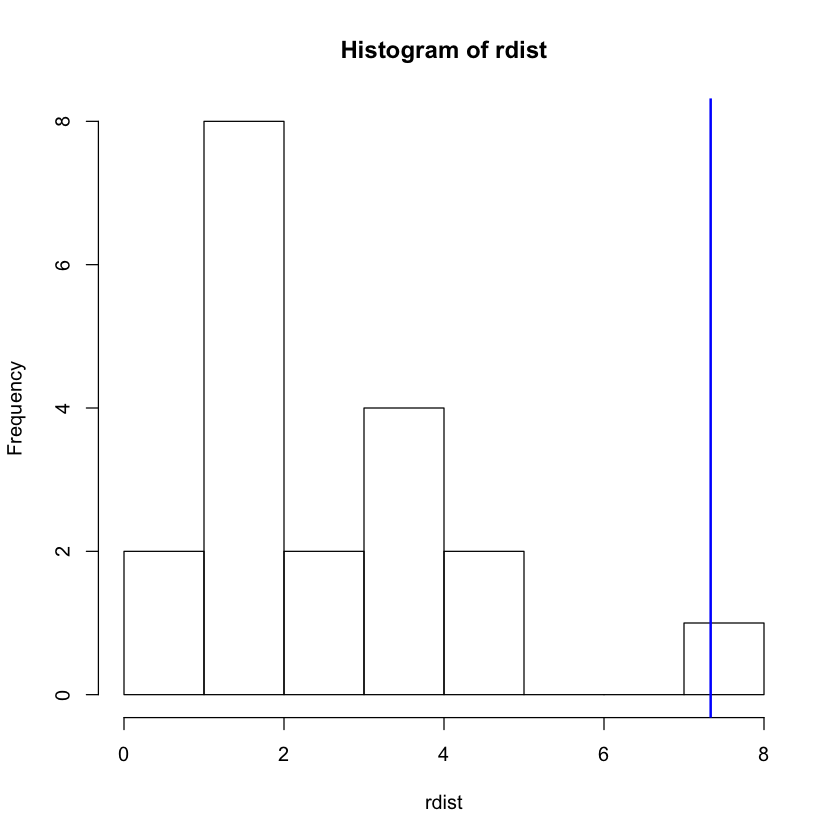

In [39]:
#install.packages('ri')
#install.packages('gtools')
library(gtools)
library('ri')
library('DT')
#basic
i<-1:6
y<-c(10,8,9,4,0,1)
D<-c(1,1,1,0,0,0)

T_stat<-abs(mean(mean(y[D==1]) - mean(y[D==0])))

diff_mean <- function(index,value){return(abs(mean(value[index])-mean(value[-index])))}

cb<-combinations(6,3)
rdist<-rep(0,nrow(cb))
for (i in 1:nrow(cb)){
    rdist[i]<-diff_mean(cb[i,],y)
    if(all(which(D==1)==cb[i,])) rdist[i]<-NA
    }

cat('T_stat:',T_stat,'\n')
cat('p-value:',mean(rdist>=T_stat,na.rm=TRUE))

hist(rdist)
abline(v=T_stat,col='blue',lwd=2)


(Intercept)          x1          x2          x3 
  2.8469322   2.3642063   1.7767446   0.8339082

pvalue: 0.0045

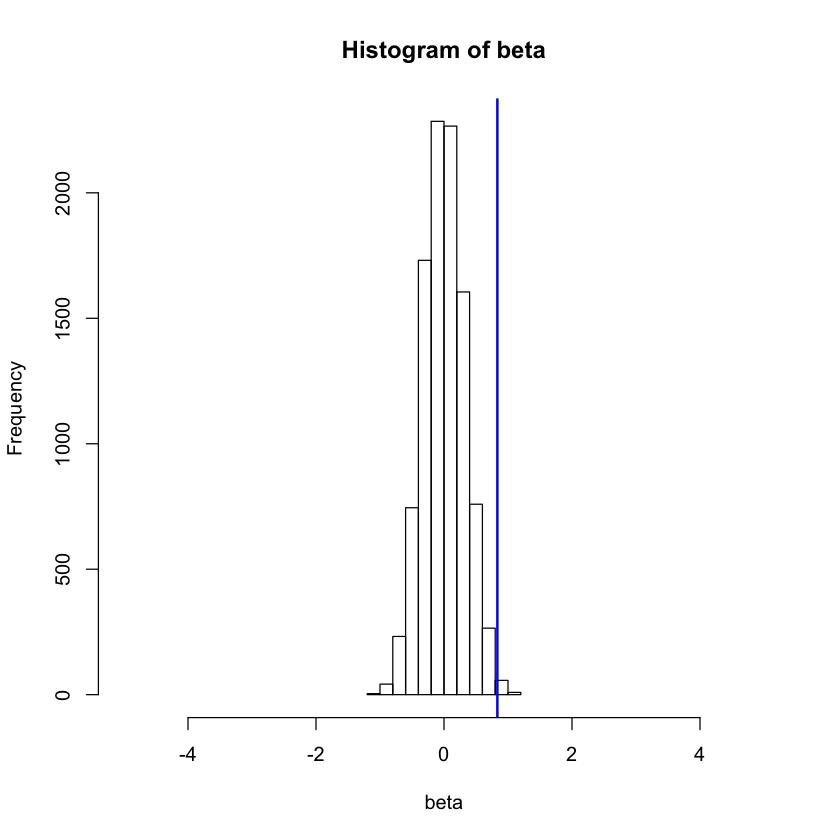

In [60]:
#회귀문제
size<-50
x1<-rbinom(size,1,.5)
x2<-rbinom(size,1,0.5)
x3<-x1*x2
y<-3+2*x1+1.4*x2+1.5*x3+rnorm(size)
fit<-lm(y~x1+x2+x3)
fit$coefficients

beta<-c()
iter<-10000
for(i in 1:iter){
x3_re<-rep(0,size)
x3_re[sample(1:size,sum(x3),replace = FALSE)]<-1
beta<-c(beta,lm(y~x1+x2+x3_re)$coefficients[4])
}
hist(beta,xlim=c(-5,5))
abline(v=fit$coefficients[4],col='blue',lwd=2)
cat('pvalue:',mean(beta>=fit$coefficients[4]))


Random assignment procedure: Complete random assignment 
Number of units: 7 
Number of treatment arms: 2 
The possible treatment categories are 0 and 1.
The number of possible random assignments is 21.  
The probabilities of assignment are constant across units: 
   prob_0    prob_1 
0.7142857 0.2857143 

term,estimate,two_tailed_p_value
d,6.5,0.3809524


term,estimate,p.value
d,6.5,0.3809524


Y,X,Z
-0.07766382,0.3554791,1
2.52497896,2.0774278,1
0.01023865,-0.9772081,0
-3.46684898,-0.2493561,1
-3.02721337,-1.2857453,1
-2.21633850,-1.2766926,0


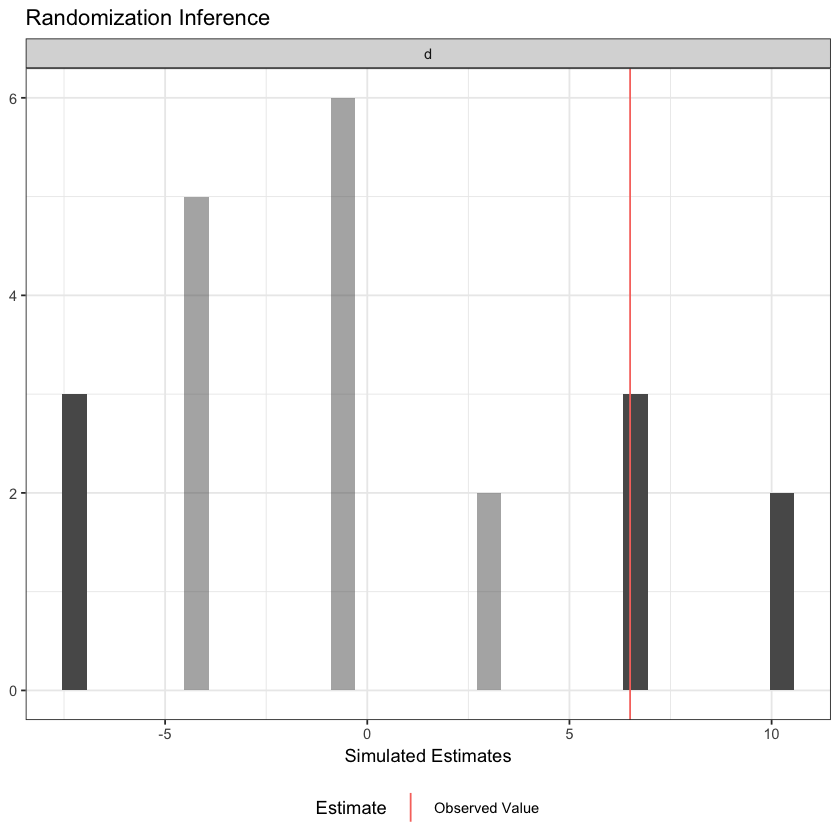

In [11]:
#install.packages('ri2')
library(ri2)
table_2.2 <-data.frame(d = c(1, 0, 0, 0, 0, 0, 1),
                   y = c(15, 15, 20, 20, 10, 15, 30))
declaration <- declare_ra(N = 7, m = 2)
declaration
out <- conduct_ri(y ~ d,
declaration = declaration, assignment = "d", sharp_hypothesis = 0,
data = table_2.2)
    summary(out)
    plot(out)
    tidy(out)

In [17]:
N <- 100
declaration <- randomizr::declare_ra(N = N, m = 50)
declaration
Z <- randomizr::conduct_ra(declaration)
X <- rnorm(N)
Y <- .9 * X + .2 * Z + 1 * X * Z + rnorm(N) 
dat <- data.frame(Y, X, Z)
head(dat)
ate_obs <- coef(lm(Y ~ Z, data = dat))[2]
coef(lm(Y ~ Z, data = dat))
ate_obs

Random assignment procedure: Complete random assignment 
Number of units: 100 
Number of treatment arms: 2 
The possible treatment categories are 0 and 1.
The number of possible random assignments is approximately infinite. 
The probabilities of assignment are constant across units: 
prob_0 prob_1 
   0.5    0.5 

Y,X,Z
2.3161748,0.4479200,1
-1.7406627,-0.3695945,1
-0.9335550,0.0236246,1
-2.0475616,-2.5149813,1
-0.3046207,-1.1229274,1
0.5728153,-0.8355211,0


(Intercept)            Z 
-0.020065502  0.007185105

Z 
0.007185105

term,estimate,two_tailed_p_value
F-statistic,32.67744,0


term,estimate,two_tailed_p_value
F-statistic,32.67744,0


term,estimate,upper_p_value
F-statistic,32.67744,0


term,estimate,lower_p_value
F-statistic,32.67744,1


term,estimate,p.value
F-statistic,32.67744,0


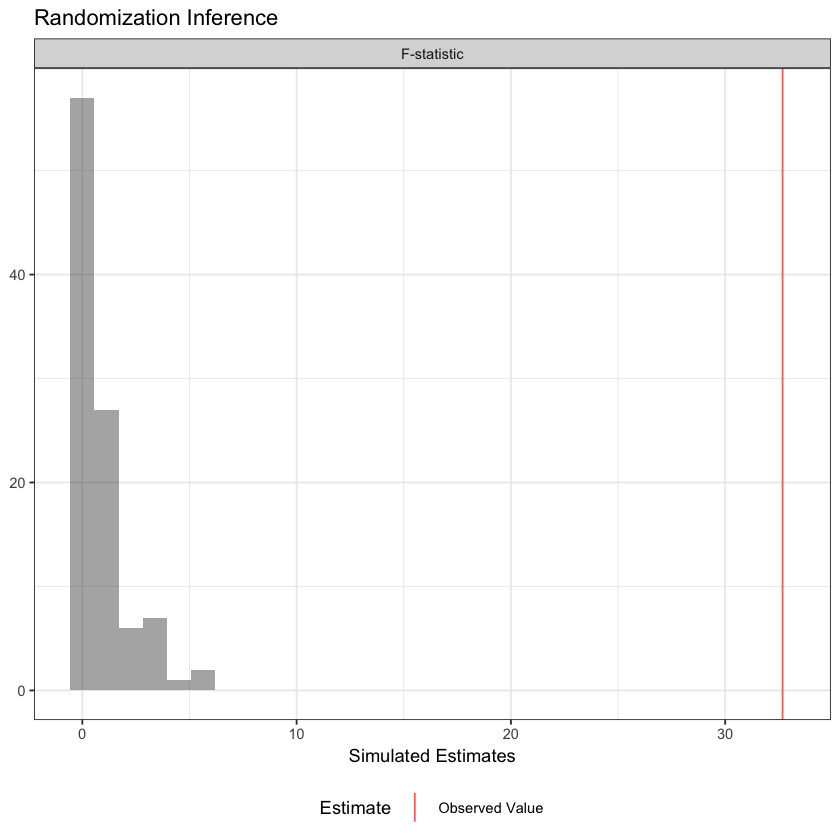

In [15]:
out <- conduct_ri(
model_1 = Y ~ Z + X,
model_2 = Y ~ Z + X + Z * X, declaration = declaration, assignment = "Z", sharp_hypothesis = ate_obs, data = dat, sims = 100
)
plot(out)
summary(out)
summary(out, p = "two-tailed") 
summary(out, p = "upper") 
summary(out, p = "lower")
tidy(out)

T 
4.2


Call:
lm(formula = y ~ cbind(c(rep(0, 10), rep(1, 10)), c(rep(0, 5), 
    rep(1, 5), rep(0, 5), rep(1, 5)), T))

Residuals:
   Min     1Q Median     3Q    Max 
  -3.0   -0.2    0.0    0.2    3.0 

Coefficients:
                                                                                    Estimate
(Intercept)                                                                           3.2000
cbind(c(rep(0, 10), rep(1, 10)), c(rep(0, 5), rep(1, 5), rep(0, 5), rep(1, 5)), T)    2.0000
cbind(c(rep(0, 10), rep(1, 10)), c(rep(0, 5), rep(1, 5), rep(0, 5), rep(1, 5)), T)    1.3000
cbind(c(rep(0, 10), rep(1, 10)), c(rep(0, 5), rep(1, 5), rep(0, 5), rep(1, 5)), T)T   2.0000
                                                                                    Std. Error
(Intercept)                                                                             0.5612
cbind(c(rep(0, 10), rep(1, 10)), c(rep(0, 5), rep(1, 5), rep(0, 5), rep(1, 5)), T)      0.7937
cbind(c(rep(0, 10), rep(1, 10)), c(rep


Call:  glm(formula = y ~ cbind(c(rep(0, 10), rep(1, 10)), c(rep(0, 5), 
    rep(1, 5), rep(0, 5), rep(1, 5)), T))

Coefficients:
                                                                        (Intercept)  
                                                                                3.2  
 cbind(c(rep(0, 10), rep(1, 10)), c(rep(0, 5), rep(1, 5), rep(0, 5), rep(1, 5)), T)  
                                                                                2.0  
 cbind(c(rep(0, 10), rep(1, 10)), c(rep(0, 5), rep(1, 5), rep(0, 5), rep(1, 5)), T)  
                                                                                1.3  
cbind(c(rep(0, 10), rep(1, 10)), c(rep(0, 5), rep(1, 5), rep(0, 5), rep(1, 5)), T)T  
                                                                                2.0  

Degrees of Freedom: 19 Total (i.e. Null);  16 Residual
Null Deviance:	    101.6 
Residual Deviance: 25.2 	AIC: 71.38

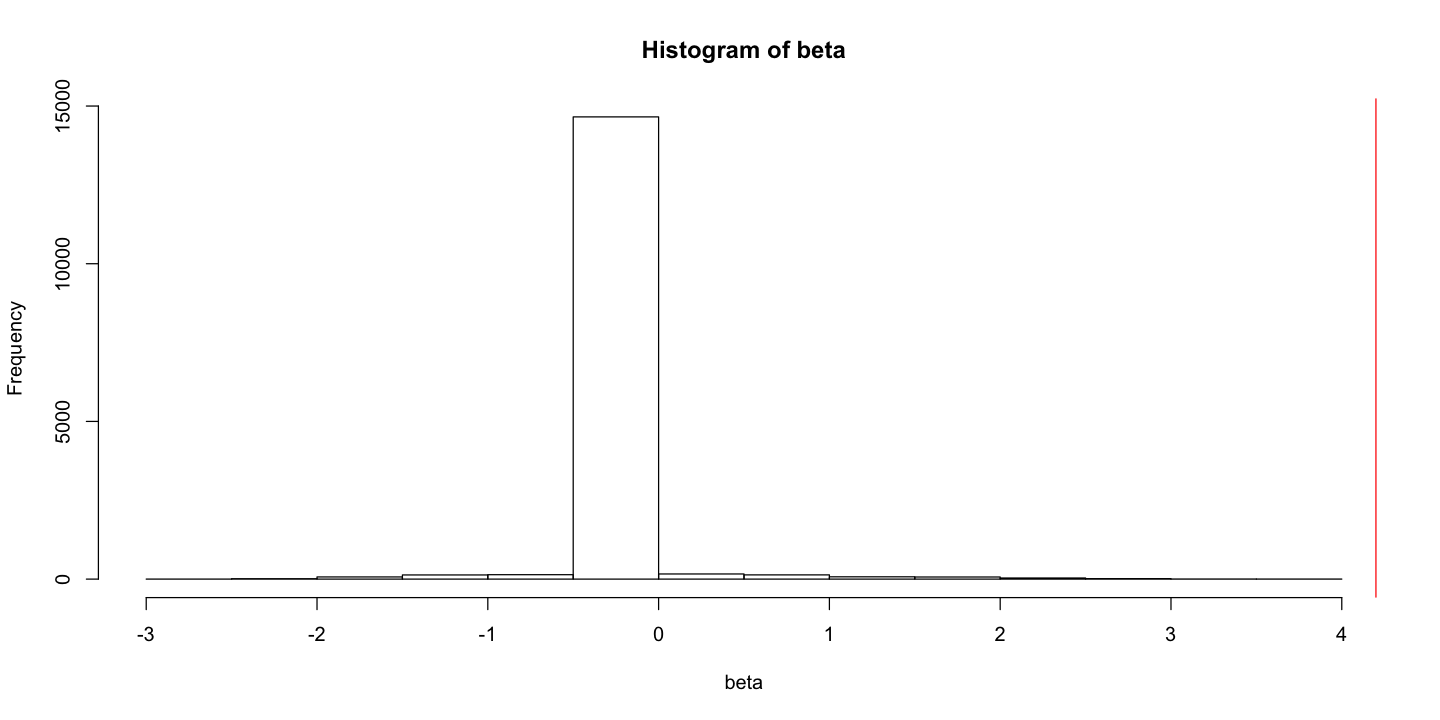

In [82]:
y<-c(c(y1,y2)+3,c(y1,y3)+5)
T<-c(rep(0,15),rep(1,5))
cb<-combinations(20,5)
len<-nrow(cb)
beta<-rep(0,len)
size<-1000
for(i in sample(1:len,size,replace=FALSE)){
    P <-rep(0,20)
    P[cb[i,]]<-1
    beta[i]<-lm(y~P)$coef[2]    
    if(all(which(T==1)==cb[i,])) beta[i]<-NA
}
hist(beta)
abline(v=lm(y~T)$coef[2],col='red')
lm(y~T)$coef[2]
fit<-lm(y~cbind(
c(rep(0,10),rep(1,10)),
c(rep(0,5),rep(1,5),rep(0,5),rep(1,5)),T))

summary(fit)
glm(y~cbind(
c(rep(0,10),rep(1,10)),
c(rep(0,5),rep(1,5),rep(0,5),rep(1,5)),T))